<a href="https://colab.research.google.com/github/duynguyen02/ml-on-practice/blob/main/DecisionTree_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.data to breast-cancer.data


In [73]:
import pandas as pd
import io
columns = ['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df = pd.read_csv(io.BytesIO(uploaded['breast-cancer.data']), skipinitialspace=True, sep=',')
df.columns = columns
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [74]:

df['Class'] = pd.factorize(df['Class'])[0] + 1
df['menopause'] = pd.factorize(df['menopause'])[0] + 1
df['age'] = pd.factorize(df['age'])[0] + 1
df['tumor-size'] = pd.factorize(df['tumor-size'])[0] + 1
df['inv-nodes'] = pd.factorize(df['inv-nodes'])[0] + 1
df['node-caps'] = pd.factorize(df['node-caps'])[0] + 1
df['deg-malig'] = pd.factorize(df['deg-malig'])[0] + 1
df['breast'] = pd.factorize(df['breast'])[0] + 1
df['breast-quad'] = pd.factorize(df['breast-quad'])[0] + 1
df['irradiat'] = pd.factorize(df['irradiat'])[0] + 1



[Text(0.5791666666666667, 0.9166666666666666, 'X[5] <= 2.5\ngini = 0.419\nsamples = 285\nvalue = [200, 85]'),
 Text(0.3416666666666667, 0.75, 'X[3] <= 2.5\ngini = 0.319\nsamples = 201\nvalue = [161, 40]'),
 Text(0.21666666666666667, 0.5833333333333334, 'X[4] <= 2.5\ngini = 0.28\nsamples = 172\nvalue = [143, 29]'),
 Text(0.13333333333333333, 0.4166666666666667, 'X[8] <= 1.5\ngini = 0.268\nsamples = 169\nvalue = [142, 27]'),
 Text(0.06666666666666667, 0.25, 'X[1] <= 1.5\ngini = 0.245\nsamples = 147\nvalue = [126, 21]'),
 Text(0.03333333333333333, 0.08333333333333333, 'gini = 0.305\nsamples = 80\nvalue = [65, 15]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.163\nsamples = 67\nvalue = [61, 6]'),
 Text(0.2, 0.25, 'X[7] <= 1.5\ngini = 0.397\nsamples = 22\nvalue = [16, 6]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.23333333333333334, 0.08333333333333333, 'gini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.3, 0.4166666666666667, 

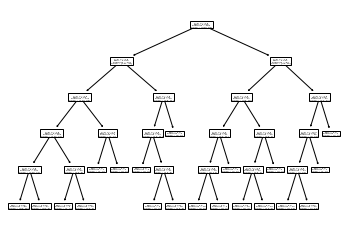

In [75]:
import numpy as np
from sklearn import tree
X = df
Y = df['Class']
del X['Class']
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X, Y)
tree.plot_tree(clf)

In [65]:
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,3,1,1,1,1,1,1,1
1,0,3,1,1,1,1,2,2,1
2,0,2,2,1,1,1,1,3,1
3,0,3,3,1,1,1,1,4,1
4,0,2,2,1,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...
280,1,3,7,1,1,1,2,3,1
281,1,3,1,1,1,3,2,3,2
282,1,2,1,1,1,2,1,3,1
283,1,2,7,4,1,3,2,2,1


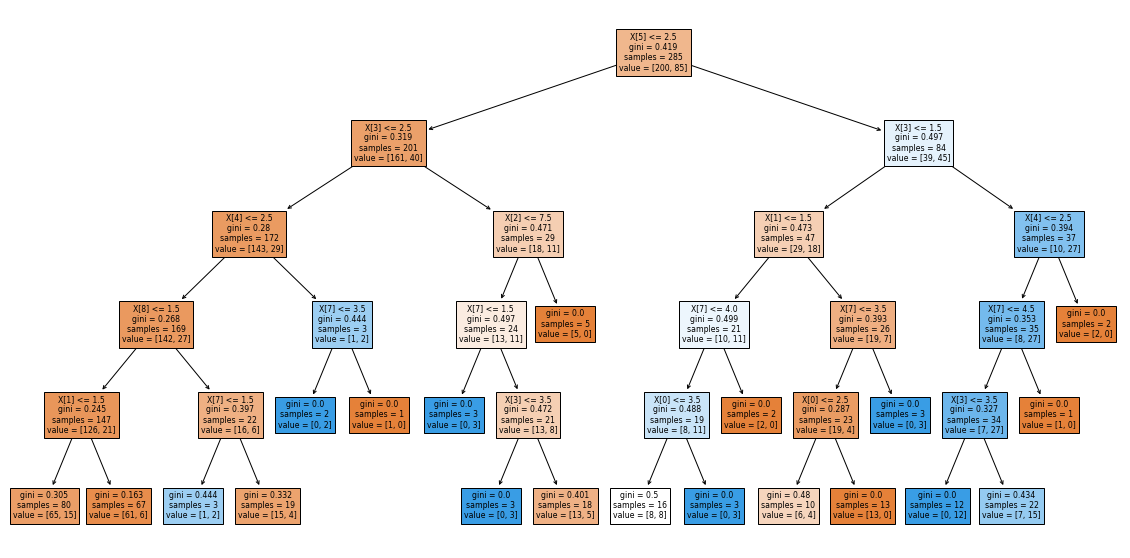

In [77]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
show_parms = DecisionTreeClassifier(max_depth=5).fit(X, Y)
plt.figure(figsize = (20,10))
plot_tree(show_parms, filled=True)
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.6511627906976745

In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y, cv=5)
scores

array([0.63157895, 0.73684211, 0.84210526, 0.59649123, 0.61403509])

In [81]:
avg = sum(scores)/len(scores)
avg

0.6842105263157895